# 명목형 변수에 대한 기초 통계량

In [84]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm # 글꼴을 시스템에 등록
import seaborn as sb
from hossam import load_data
from pandas import crosstab
import numpy as np
from pandas import DataFrame

## 그래프 초기화

In [2]:
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
sb.set_theme(style = my_theme)

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False


In [3]:
origin = load_data('score')
origin

[data] https://data.hossam.kr/data/lab09/score.xlsx
[desc] 명목형 변수에 대한 탐색적 데이터 분석을 위한 샘플 데이터
[!] Cannot read metadata


,gender,score
0,M,A
1,M,C
2,M,B
3,M,B
4,W,A
5,W,C
6,W,C
7,W,B


## 데이터 전처리

In [4]:
df1 = origin.astype({'gender':'category','score':'category'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   gender  8 non-null      category
 1   score   8 non-null      category
dtypes: category(2)
memory usage: 404.0 bytes


## 명목형 변수의 EDA
### 기술 통계량

In [5]:
df1.describe(include = 'category')

,gender,score
count,8,8
unique,2,3
top,M,B
freq,4,3


## 값의 종류별 빈도
### 값의 종류별 데이터 수 집계

In [6]:
for c in df1.columns:
    print('==', c, '==')
    print(df1[c].value_counts())

== gender ==
gender
M    4
W    4
Name: count, dtype: int64
== score ==
score
B    3
C    3
A    2
Name: count, dtype: int64


### 빈도수 시각화

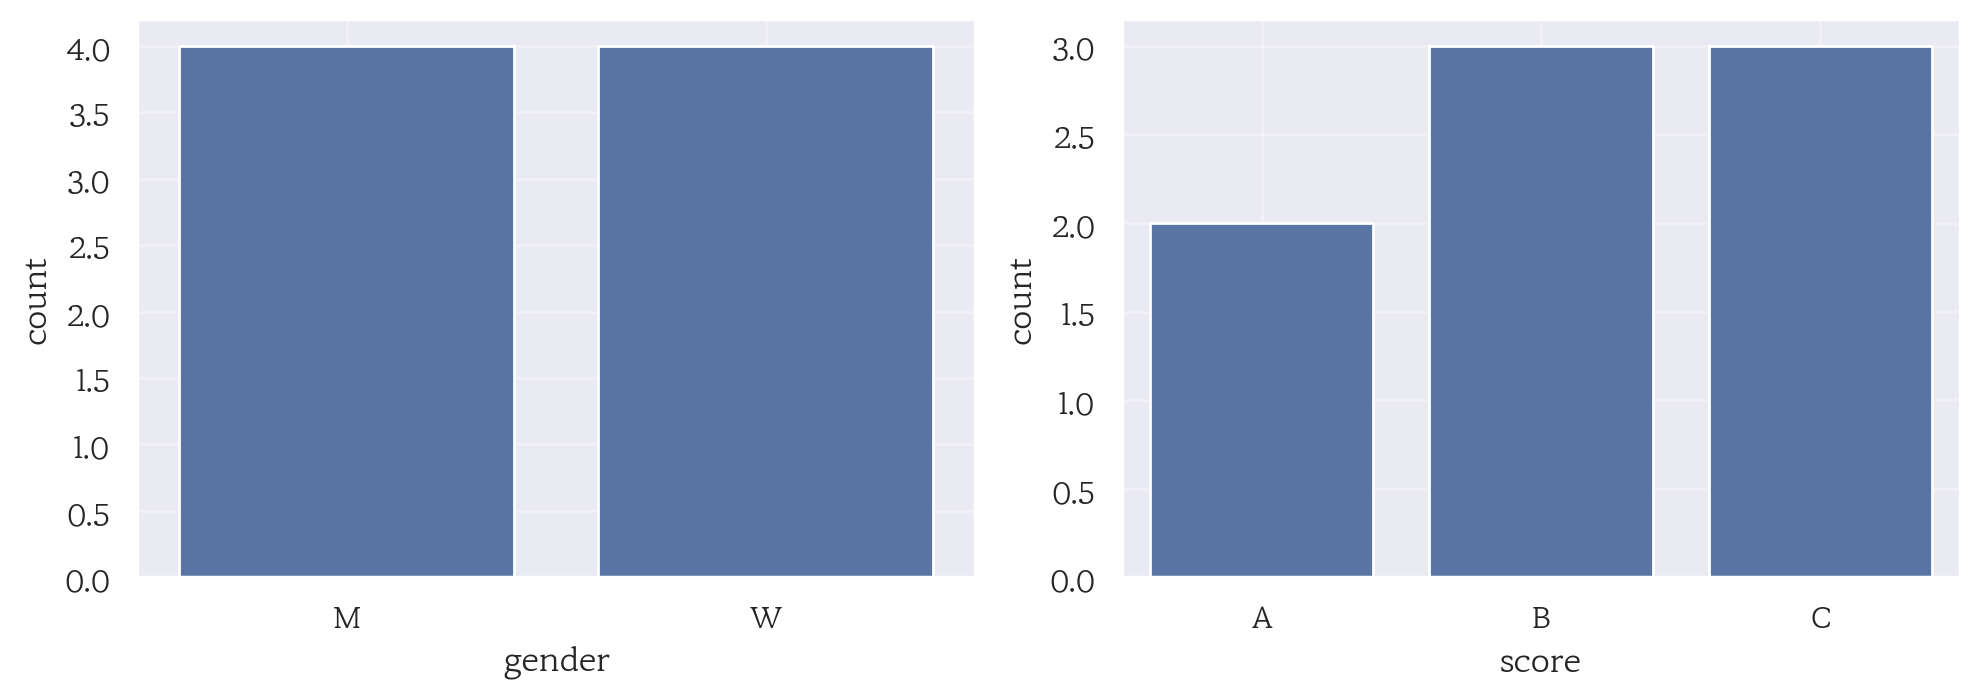

In [7]:
width_px = 2000
height_px = 720
rows = 1
cols = 2
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# count 그리기
for i, v in enumerate(df1.columns):
    sb.countplot(data=df1,
             x = v,
             ax = ax[i])
    ax[i].grid(True, alpha = 0.3)       

# 출력
plt.tight_layout()
plt.show()
plt.close()

## 교차표
### 교차표 만들기

In [8]:
cb1 = crosstab(index = df1['gender'], columns = df1['score'],
        rownames = ['성별'], colnames = ['점수'])
cb1

점수,A,B,C
성별,,,
M,1,2,1
W,1,1,2


### 비율과 합계 표시

In [9]:
cb2 = crosstab(index = origin['gender'], columns = origin['score'],
                rownames = ['성별'], colnames = ['점수'], margins = True,
                normalize = True)
cb2

점수,A,B,C,All
성별,,,,
M,0.125,0.250,0.125,0.5
W,0.125,0.125,0.250,0.5
All,0.250,0.375,0.375,1.0


### 교차표 시각화(히트맵 사용)

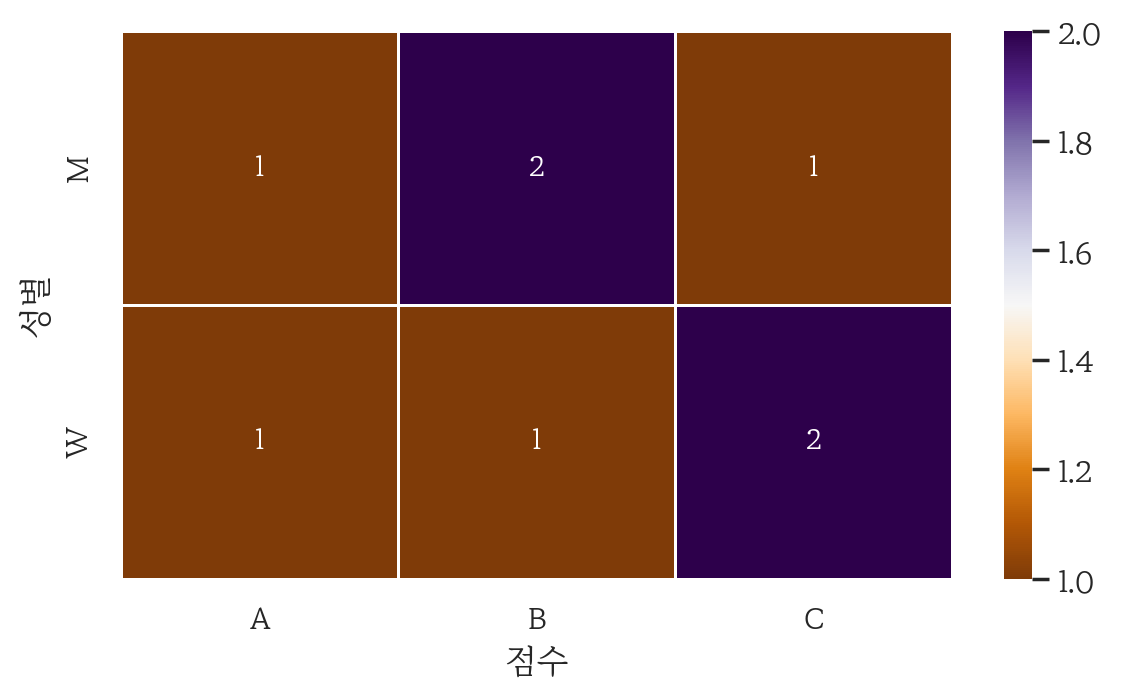

In [10]:
width_px = 1200
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# point 그리기
sb.heatmap(data= cb1, annot = True, fmt = 'd', linewidth = 0.5, cmap = 'PuOr')
# 출력
plt.tight_layout()
plt.show()
plt.close()

## 연습문제
### 부동산 시장 분석 프로젝트

In [11]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm # 글꼴을 시스템에 등록
import seaborn as sb
from hossam import load_data
import numpy as np

In [85]:
origin = load_data('boston')
origin.head()

[data] https://data.hossam.kr/data/kaggle/boston.xlsx
[desc] 보스턴 인근 지역의 인구·환경·교육·범죄·세금 정보 등을 기반으로 주택의 중위가격(MEDV)을 예측하기 위해 수집된 대표적인 회귀 분석용 주택시장 데이터 (출처: https://www.kaggle.com/datasets/altavish/boston-housing-dataset)

field    description
-------  ---------------------------------------------------------------------------------------
CRIM     타운별 1인당 범죄율 (Per capita crime rate by town)
ZN       25,000 sqft 이상 주거용 대지 비율 (Proportion of residential land zoned for large lots)
INDUS    비소매 상업구역 비율 (Proportion of non-retail business acres per town)
CHAS     찰스강 인접 여부 (Charles River dummy variable: 1 if tract bounds river; 0 otherwise)
NOX      대기 오염 정도 (Nitric oxides concentration, parts per 10 million)
RM       주택당 평균 방(Room) 수 (Average number of rooms per dwelling)
AGE      1940년 이전 건축 비율 (Proportion of owner-occupied units built prior to 1940)
DIS      5개 주요 고용센터까지의 거리 (Weighted distances to five Boston employment centers)
RAD      고속도로 접근성 지수 (Index of accessibility to radial highways)
T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 문제 1 - 1

In [86]:
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")
print(origin.info())

데이터셋 크기: (506, 14)
열 개수: 14
행 개수: 506
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


### 문제 1 - 2

In [91]:
df = origin.astype({'CHAS':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    int64   
 9   TAX      506 non-null    int64   
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(1), float64(11), int64(2)
memory usage: 52.1 KB


### 문제 1- 3

In [93]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

- 데이터 완성도: 결측치가 존재하지 않는다

In [95]:
fields = ['MEDV', 'CRIM','RM','LSTAT','NOX']
df[fields].describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
LSTAT,506.0,12.653063,7.141062,1.73000,6.950000,11.36000,16.955000,37.9700
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710


In [97]:
result = []

for f in fields:
    mean_val = df[f].mean()
    median_val = df[f].median()

    if mean_val > median_val:
        skew_type = 'Right-skewed'
    elif mean_val < median_val:
        skew_type = 'Left-skewed'
    else:
        skew_type = 'Symmetric'
    
    result.append({'df':f, 'mean': mean_val, 'median':median_val, 'skew':skew_type})

DataFrame(result)

,df,mean,median,skew
0,MEDV,22.532806,21.20000,Right-skewed
1,CRIM,3.613524,0.25651,Right-skewed
2,RM,6.284634,6.20850,Right-skewed
3,LSTAT,12.653063,11.36000,Right-skewed
4,NOX,0.554695,0.53800,Right-skewed


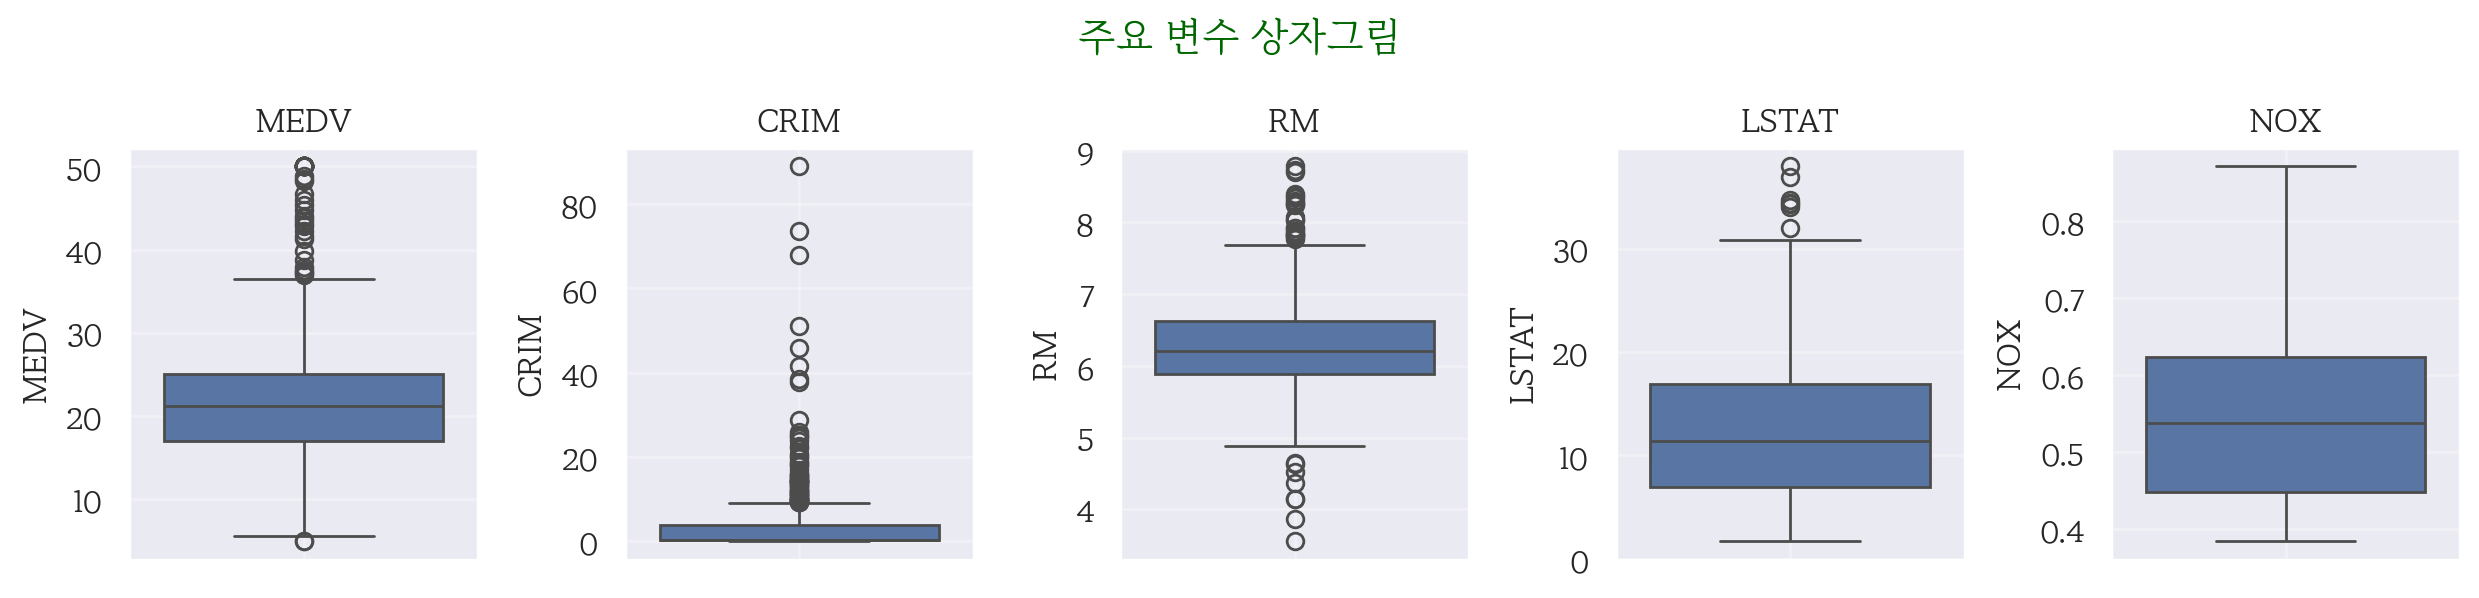

In [102]:
width_px = 2500
height_px = 600
rows = 1
cols = 5
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

for i, v in enumerate(fields):
    sb.boxplot(data = df, y = v, ax = ax[i])
    ax[i].set_title(v)
    ax[i].grid(alpha = 0.3)
# box 그리기

# 그래프 꾸미기
fig.suptitle('주요 변수 상자그림', fontsize = 14, color = '#006600')
fig.subplots_adjust(wspace = 0.2, hspace = 0.2)

# 출력
plt.tight_layout()
plt.savefig('myplot.png', dpi = my_dpi)
plt.show()
plt.close()

### 중심 경향성 및 산포도 해석

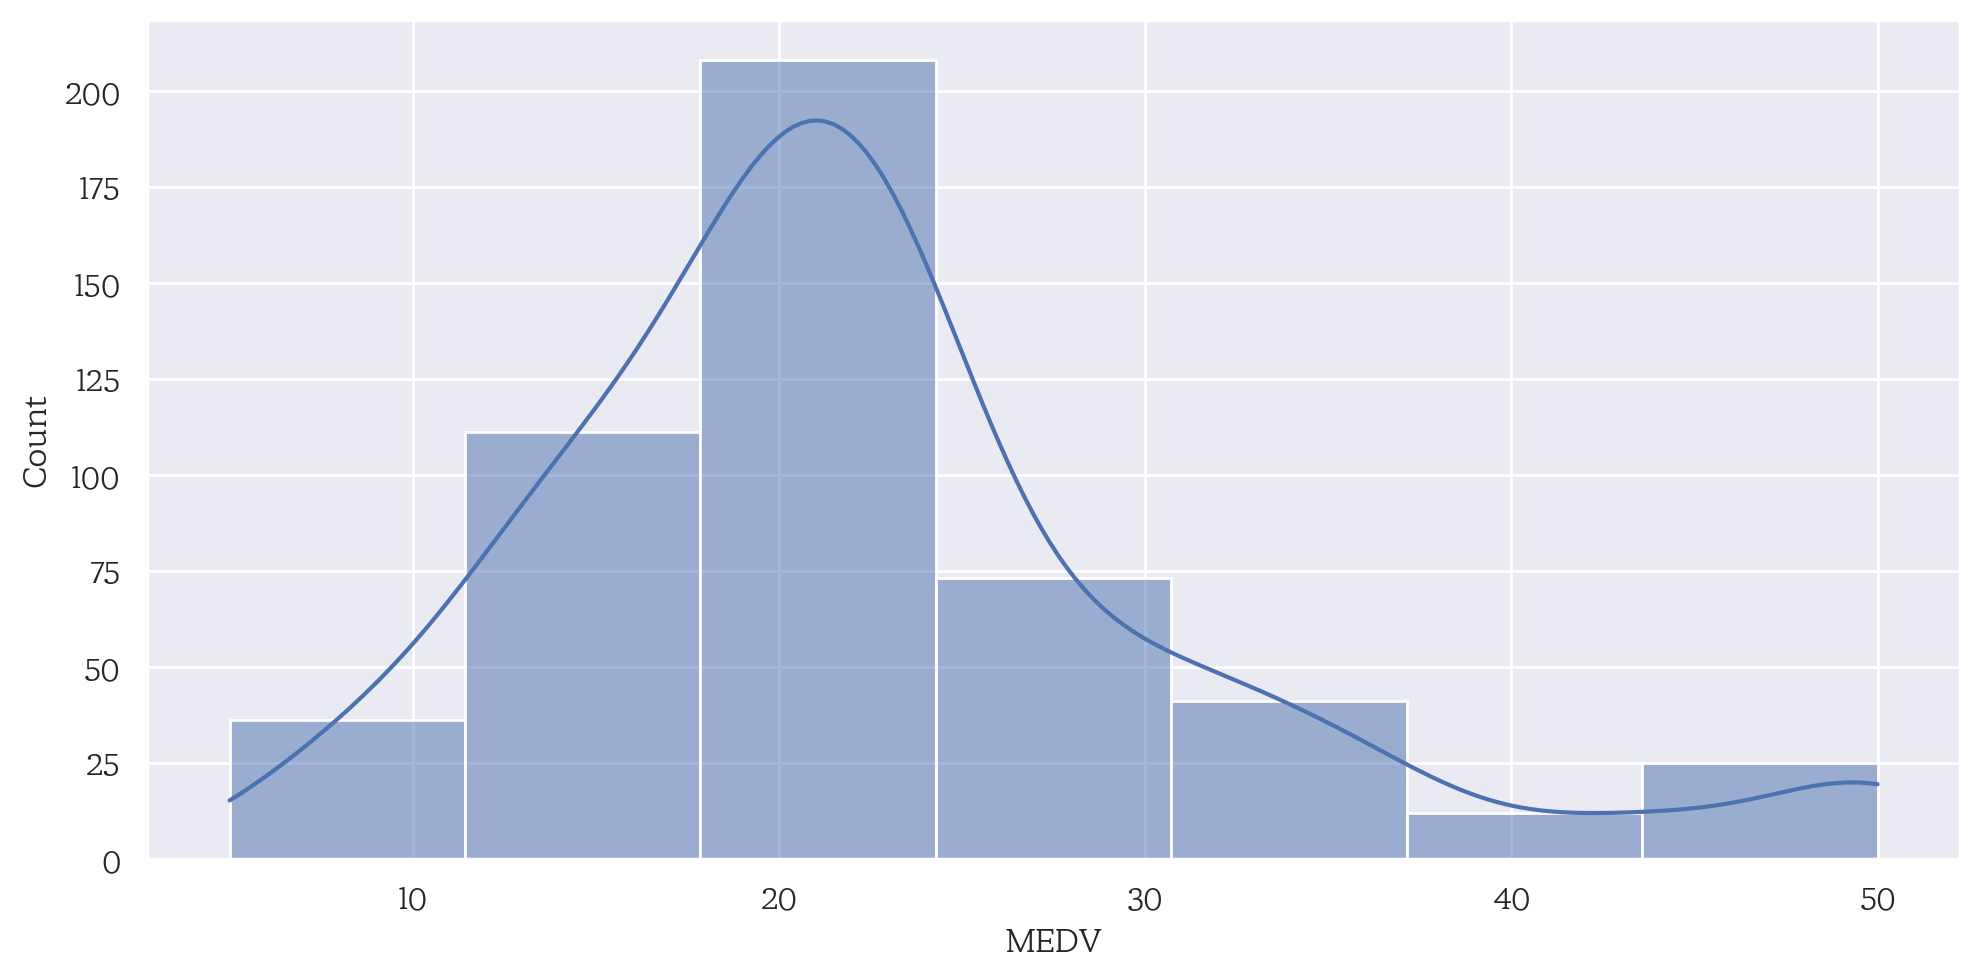

In [ ]:
width_px = 2000
height_px = 100
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.histplot(data= df, x = 'MEDV', bins = 7, kde = True)
# 그래프 꾸미기
ax.grid(True) # 배경 격자 표시/숨김

# 출력
plt.tight_layout()
plt.savefig('myplot.png', dpi = my_dpi)
plt.show()
plt.close()

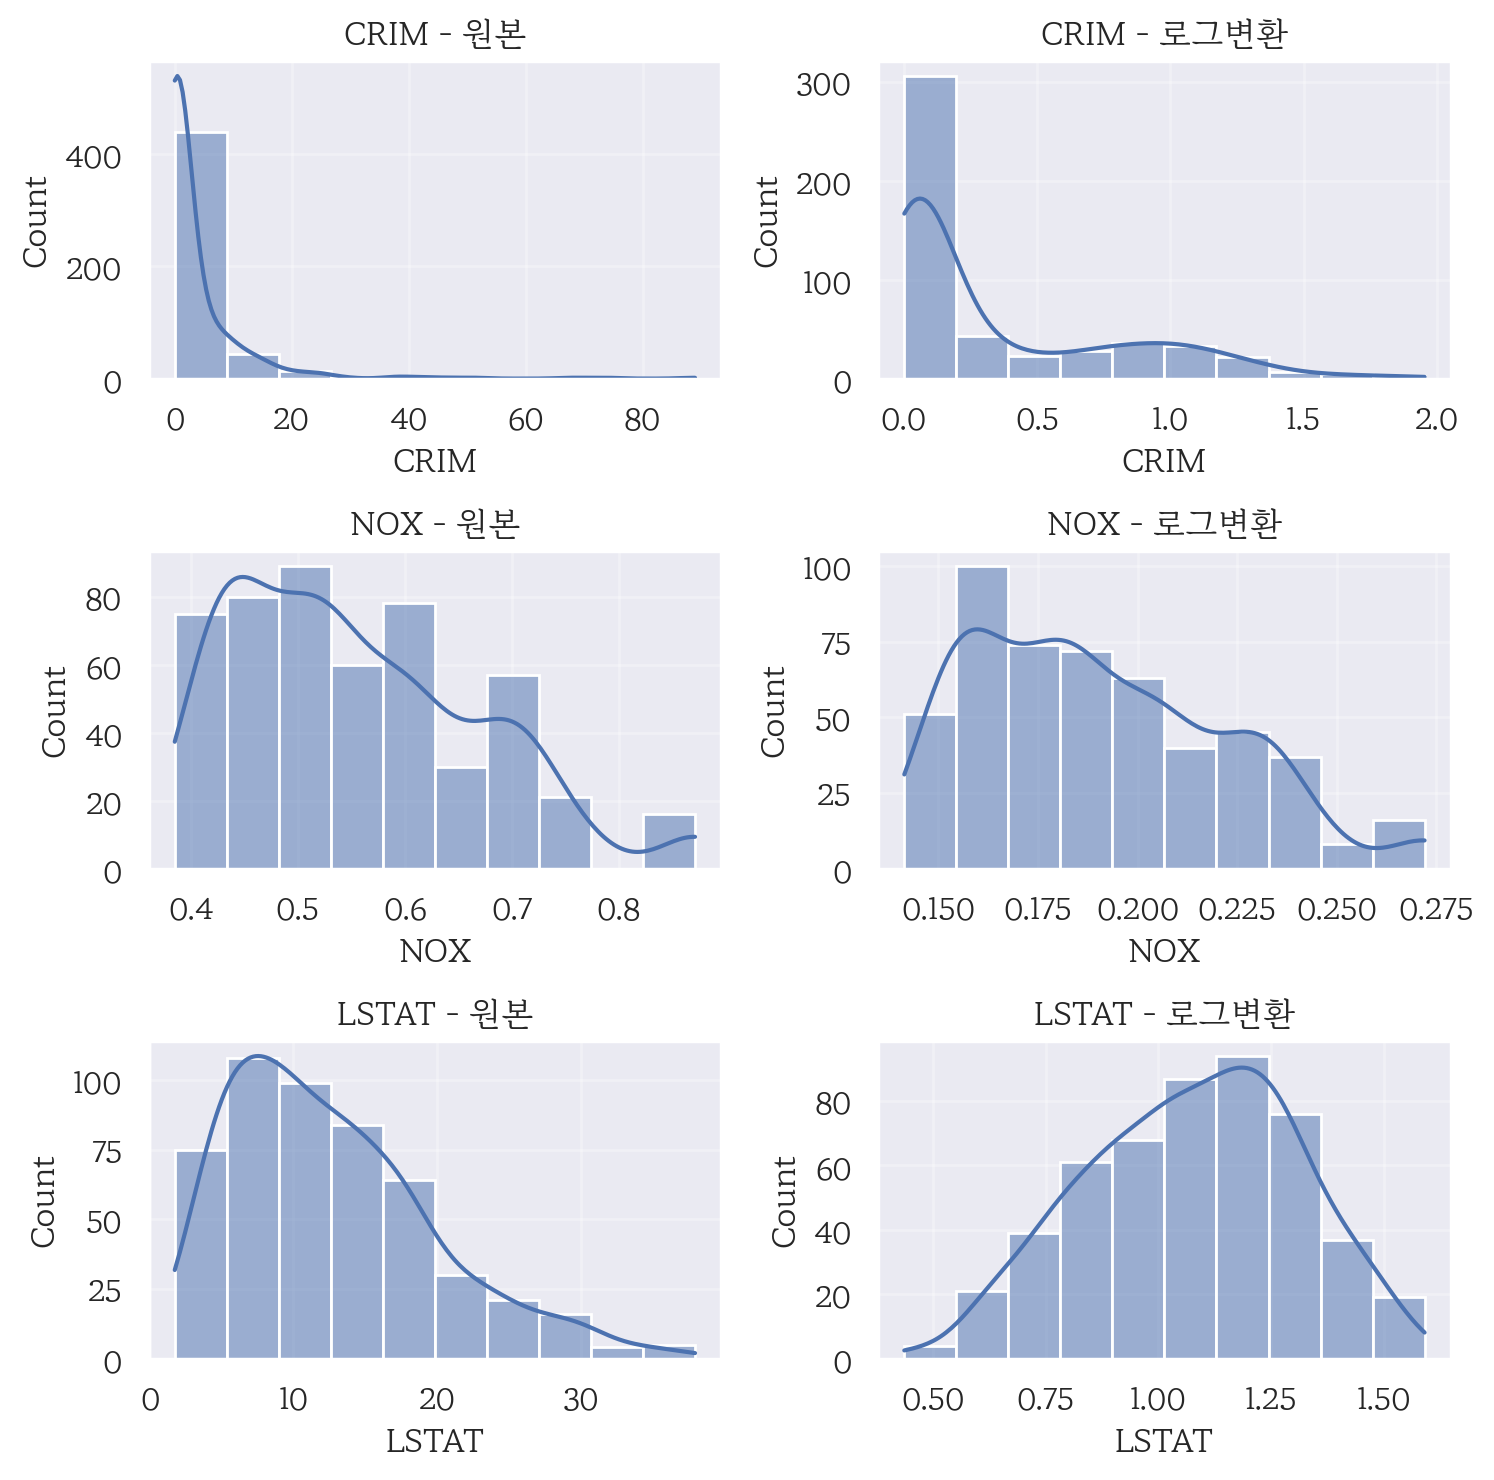

In [109]:
skewed_vars = ['CRIM','NOX','LSTAT']

width_px = 1500
height_px = 1500
rows = len(skewed_vars)
cols = 2
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# histogram 그리기
for i, v in enumerate(skewed_vars):
    # 원본 분포 확인
    sb.histplot(data = df, x = v, bins = 10, kde = True, ax = ax[i][0])
    ax[i][0].set_title(f'{v} - 원본')
    ax[i][0].grid(alpha = 0.3)

    # log변환 후 분포 확인
    log_data = np.log10(df[v] + 1)
    sb.histplot(data = log_data, bins = 10, kde = True, ax = ax[i][1])
    ax[i][1].set_title(f'{v} - 로그변환')
    ax[i][1].grid(alpha = 0.3)

# 출력
plt.tight_layout()
plt.savefig('myplot.png', dpi = my_dpi)
plt.show()
plt.close()

In [110]:
df.groupby('CHAS')['MEDV'].describe()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7484\4275711058.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('CHAS')['MEDV'].describe()


,count,mean,std,min,25%,50%,75%,max
CHAS,,,,,,,,
0,471.0,22.093843,8.831362,5.0,16.6,20.9,24.80,50.0
1,35.0,28.440000,11.816643,13.4,21.1,23.3,33.15,50.0


### 강변 위치에 따른 주택 가격의 차이 - 기초통계량을 통하여

In [112]:
chas_counts = df['CHAS'].value_counts()
chas_counts

CHAS
0    471
1     35
Name: count, dtype: int64

In [114]:
# 평균 가격 차이 계산
avg_price_non_river = df[df['CHAS'] == 0]['MEDV'].mean()
avg_price_river = df[df['CHAS'] == 1]['MEDV'].mean()
price_diff = avg_price_river - avg_price_non_river
print(f"\n가격 차이 분석:")
print(f"비강변 지역 평균 가격: ${avg_price_non_river:.2f}K")
print(f"강변 지역 평균 가격: ${avg_price_river:.2f}K")
print(f"가격 차이: ${price_diff:.2f}K ({price_diff/
avg_price_non_river*100:.1f}% 높음)")


가격 차이 분석:
비강변 지역 평균 가격: $22.09K
강변 지역 평균 가격: $28.44K
가격 차이: $6.35K (28.7% 높음)


### 종합 보고서
 - 완성도: 결측치 없음(100% 완성도)
 - 일관성: 명목형 변수 -> category 타입으로 변환, 대부분 변수가 숫자 타입
 - 분포특성: 대부분 변수에서 우편향 분포 확인

## 명목형 기술통계 연습문제

In [74]:
origin = load_data('privacy')
origin.head()

[data] https://data.hossam.kr/data/lab09/privacy.xlsx
[desc] 제주도 남녀 대학생의 개인정보 관리방법에 관한 설문조사 결과 데이터 (출처: 사회조사분석사 2급 실기작업형 기출)
[!] Cannot read metadata


,학생ID,성별,메모종류
0,1,남,3
1,2,여,2
2,3,여,2
3,4,여,1
4,5,여,2


In [29]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학생ID    30 non-null     int64 
 1   성별      30 non-null     object
 2   메모종류    30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


In [39]:
df1 = origin.astype({'성별':'category', '메모종류':'category'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   학생ID    30 non-null     int64   
 1   성별      30 non-null     category
 2   메모종류    30 non-null     category
dtypes: category(2), int64(1)
memory usage: 688.0 bytes


In [47]:
df1.describe(include = 'category')

,성별,메모종류
count,30,30
unique,2,3
top,여,2
freq,22,20


In [44]:
for i in df1.columns:
    print('==', i,'==')
    print(df1[i].value_counts())
    

== 학생ID ==
학생ID
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
Name: count, dtype: int64
== 성별 ==
성별
여    22
남     8
Name: count, dtype: int64
== 메모종류 ==
메모종류
2    20
1     6
3     4
Name: count, dtype: int64


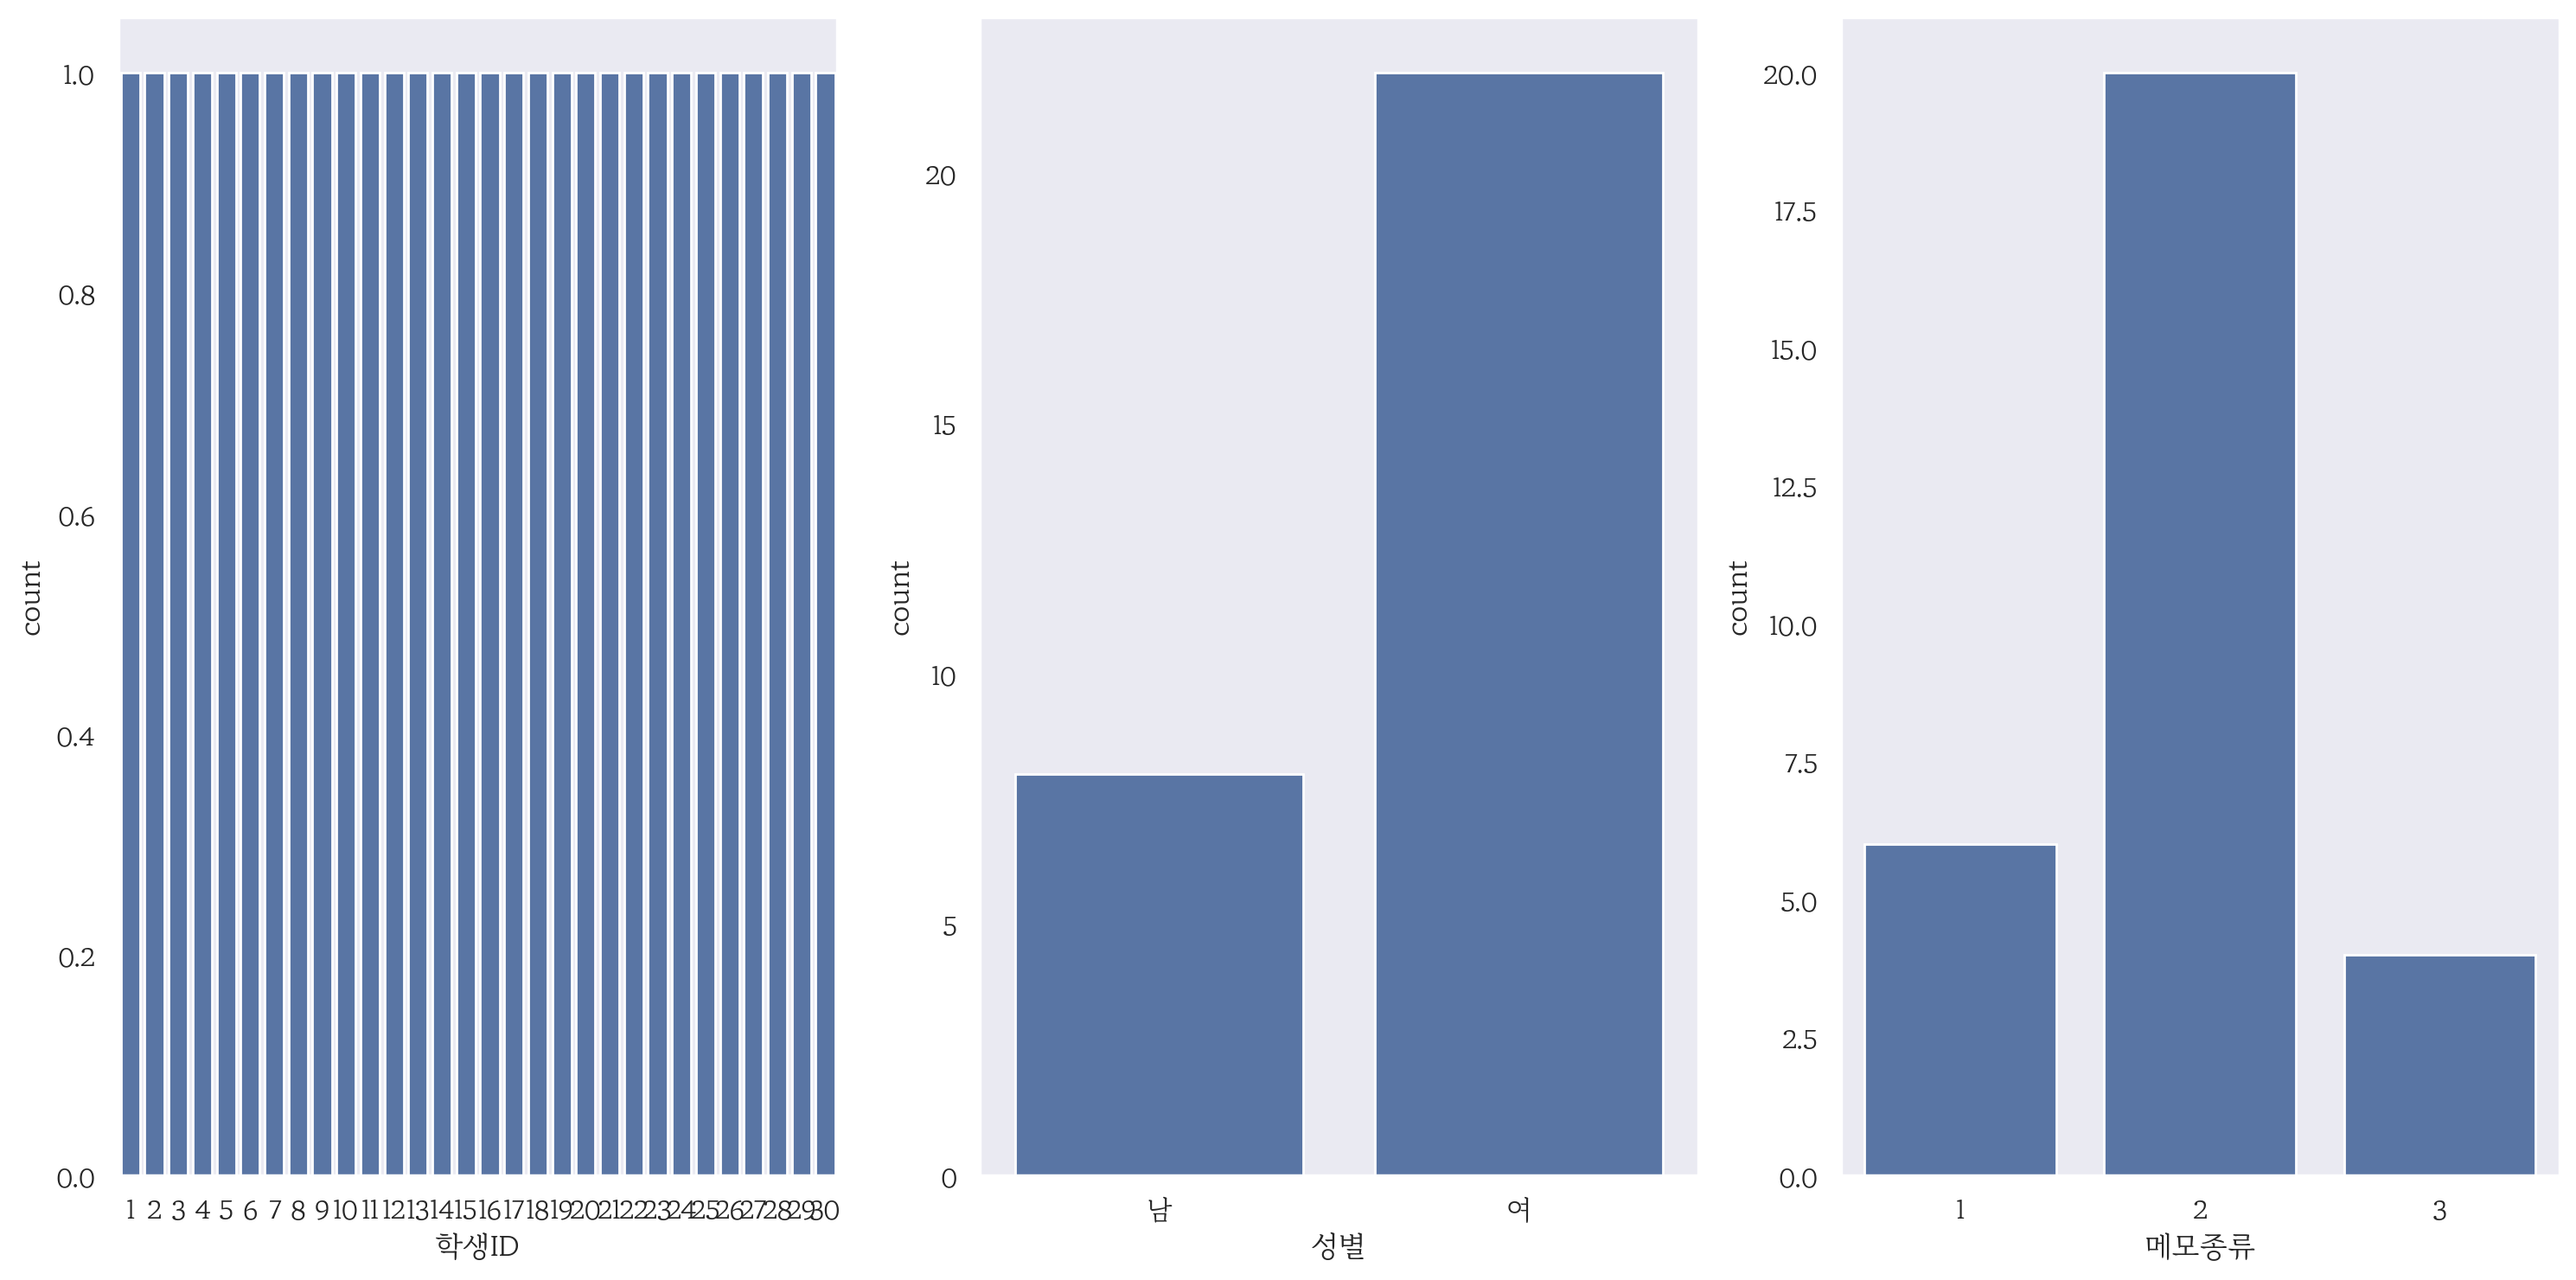

In [61]:
width_px = 3000
height_px = 1500
rows = 1
cols = 3
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

for i, v in enumerate(df1.columns):
# count 그리기
    sb.countplot(data=df1,
             x =v,
             ax = ax[i]                        
          )       

# 출력
plt.tight_layout()
plt.savefig('myplot.png', dpi = my_dpi)
plt.show()
plt.close()

In [63]:
cb1 = crosstab(index = df1['성별'], columns = df1['메모종류'],
               rownames = ['성별'], colnames = ['메모종류'])
cb1

메모종류,1,2,3
성별,,,
남,2,4,2
여,4,16,2


In [115]:
cb2 = crosstab(index = df1['성별'], columns = df1['메모종류'],
               rownames = ['성별'], colnames = ['메모종류'], normalize = True)
cb2

메모종류,1,2,3
성별,,,
남,0.066667,0.133333,0.066667
여,0.133333,0.533333,0.066667


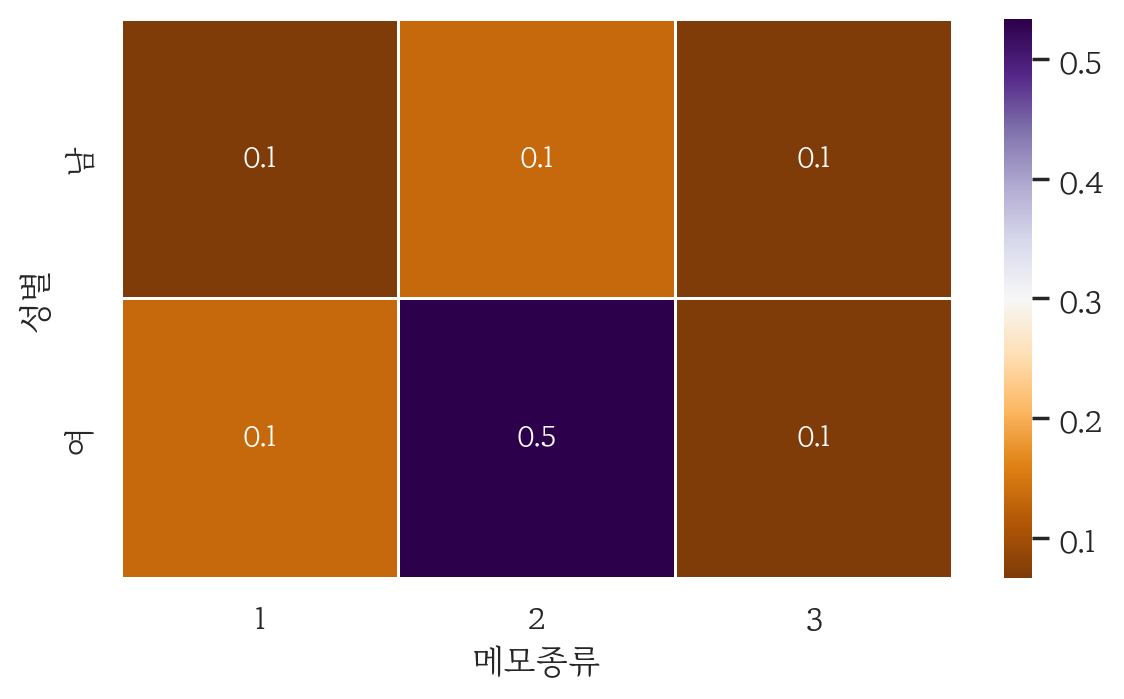

In [118]:
width_px = 1200
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# bar 그리기
sb.heatmap(data = cb2, annot = True, fmt = '0.1f', linewidth = 0.5, cmap = 'PuOr')


# 출력
plt.tight_layout()
plt.savefig('myplot.png', dpi = my_dpi)
plt.show()

plt.close()